In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("data/spotify_cleaned.csv")
print(f"Data loaded with shape: {df.shape}")


# Encode target for genre classification
if "track_genre" in df.columns:
    le = LabelEncoder()
    df['genre_label'] = le.fit_transform(df['track_genre'])
    
# Features selection
feature_cols = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence",
    "tempo", "duration_sec"
]

X = df[feature_cols]
y = df['genre_label']  # for genre classification

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


Data loaded with shape: (89741, 23)


In [3]:
# Encode target for genre classification
if "track_genre" in df.columns:
    le = LabelEncoder()
    df['genre_label'] = le.fit_transform(df['track_genre'])
    print(f"Number of unique genres: {len(le.classes_)}")

# Select features
feature_cols = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence",
    "tempo", "duration_sec"
]

X = df[feature_cols]
y = df['genre_label']

# Check missing values
print("Missing values per feature:")
print(X.isna().sum())


Number of unique genres: 113
Missing values per feature:
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_sec        0
dtype: int64


In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training shape: {X_train_scaled.shape}, Test shape: {X_test_scaled.shape}")


Training shape: (71792, 10), Test shape: (17949, 10)


In [5]:
# Train RandomForest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test_scaled)


Accuracy: 0.3535015878321912

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.23      0.21       200
           1       0.30      0.28      0.29       200
           2       0.37      0.27      0.31       200
           3       0.77      0.49      0.60        81
           4       0.31      0.29      0.30       200
           5       0.30      0.19      0.23       199
           6       0.40      0.60      0.48       199
           7       0.27      0.43      0.33       200
           8       0.62      0.36      0.46       188
           9       0.15      0.09      0.11       187
          10       0.29      0.33      0.31       199
          11       0.36      0.14      0.20       180
          12       0.17      0.28      0.21       200
          13       0.40      0.52      0.45       200
          14       0.41      0.48      0.45       195
          15       0.24      0.30      0.27       194
          16       0.63    

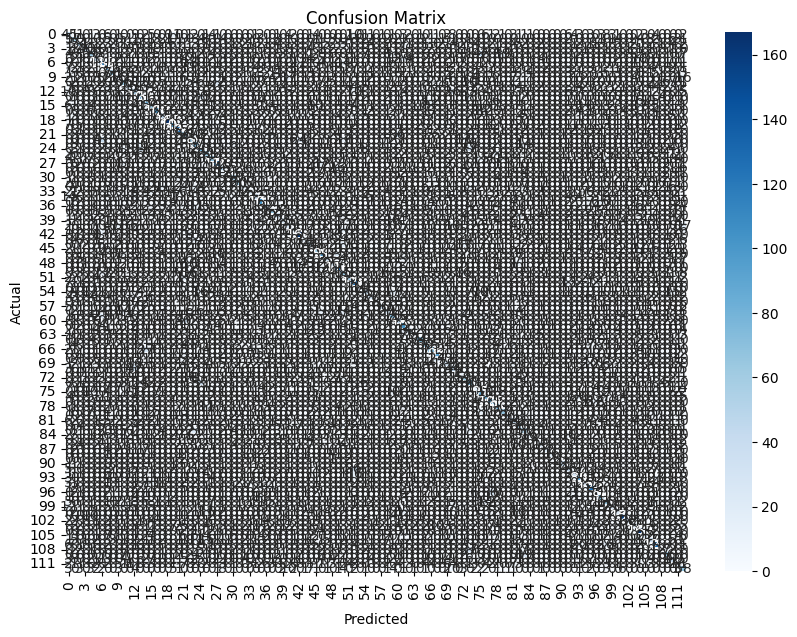

In [6]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


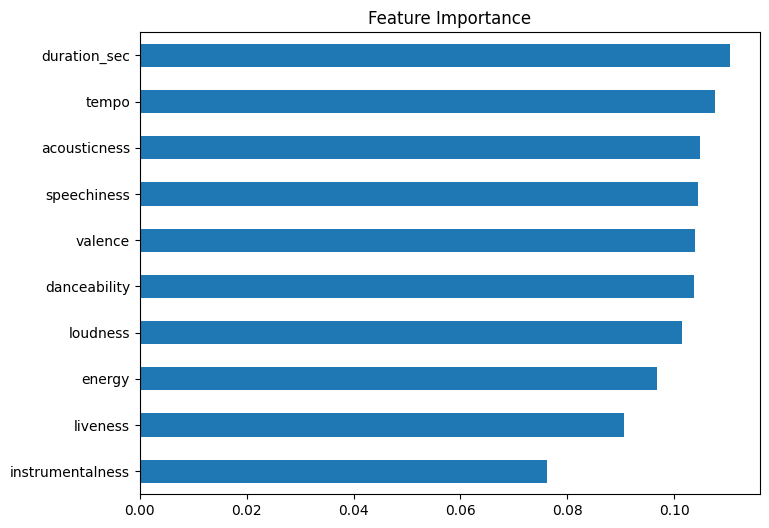

In [7]:
# Feature importance
feat_imp = pd.Series(rf_model.feature_importances_, index=feature_cols)
feat_imp.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()


In [9]:
import joblib
from pathlib import Path

# Create models directory if it doesn't exist
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Save RandomForest model using joblib (handles large models better)
model_path = models_dir / "rf_genre_model.joblib"
joblib.dump(rf_model, model_path)
print(f"RandomForest model saved to: {model_path}")

# Save LabelEncoder using joblib
le_path = models_dir / "genre_label_encoder.joblib"
joblib.dump(le, le_path)
print(f"LabelEncoder saved to: {le_path}")

# Save scaler (optional, for Streamlit input scaling)
scaler_path = models_dir / "scaler.joblib"
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to: {scaler_path}")


RandomForest model saved to: models\rf_genre_model.joblib
LabelEncoder saved to: models\genre_label_encoder.joblib
Scaler saved to: models\scaler.joblib


In [5]:
import pandas as pd

# Load cleaned Spotify dataset
df = pd.read_csv("data/spotify_cleaned.csv")

# Quick check
print(df.shape)
df.head(3)


(89741, 23)


,unnamed:_0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_sec,duration_min
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,230.666,3.844433
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,149.610,2.493500
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic,210.826,3.513767


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature columns (numeric audio features)
feature_cols = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "duration_sec"
]

X = df[feature_cols]  # input features
y = df["track_genre"]  # target

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample test set if large
MAX_TEST_ROWS = 1000
if len(X_test_scaled) > MAX_TEST_ROWS:
    X_test_sample = X_test_scaled[:MAX_TEST_ROWS]
    y_test_sample = y_test[:MAX_TEST_ROWS]
else:
    X_test_sample = X_test_scaled
    y_test_sample = y_test

# Predictions
y_pred = rf_model.predict(X_test_sample)

# Accuracy
acc = accuracy_score(y_test_sample, y_pred)
print(f"Test Accuracy: {acc:.3f}\n")

# Only include labels actually present in y_test_sample
unique_labels = np.unique(y_test_sample)

# Classification report
print("Classification Report:\n")
print(classification_report(
    y_test_sample, 
    y_pred, 
    labels=unique_labels, 
    target_names=le.inverse_transform(unique_labels)
))

# Confusion matrix (optional)
NUM_CLASSES_LIMIT = 30
if len(unique_labels) <= NUM_CLASSES_LIMIT:
    cm = confusion_matrix(y_test_sample, y_pred, labels=unique_labels)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.inverse_transform(unique_labels), 
                yticklabels=le.inverse_transform(unique_labels))
    plt.xlabel("Predicted Genre")
    plt.ylabel("Actual Genre")
    plt.title("Confusion Matrix")
    plt.show()
else:
    print(f"Too many classes ({len(unique_labels)}) to plot confusion matrix safely.")



Test Accuracy: 0.299

Classification Report:

                   precision    recall  f1-score   support

         acoustic       0.20      0.15      0.17        13
         afrobeat       0.27      0.24      0.25        17
         alt-rock       0.40      0.29      0.33         7
      alternative       1.00      1.00      1.00         2
          ambient       0.45      0.50      0.48        10
            anime       0.43      0.18      0.25        17
      black-metal       0.33      0.46      0.39        13
        bluegrass       0.12      0.50      0.19         4
            blues       1.00      0.25      0.40         8
           brazil       0.00      0.00      0.00        11
        breakbeat       0.29      0.27      0.28        15
          british       0.00      0.00      0.00         7
         cantopop       0.12      0.38      0.19         8
    chicago-house       0.27      0.43      0.33         7
         children       0.27      0.33      0.30         9
         

c:\Users\saubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\saubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Feature Importance:

duration_sec        0.120192
speechiness         0.109948
acousticness        0.109226
danceability        0.108209
valence             0.107278
tempo               0.105182
loudness            0.097368
energy              0.088422
instrumentalness    0.086200
liveness            0.067974
dtype: float64


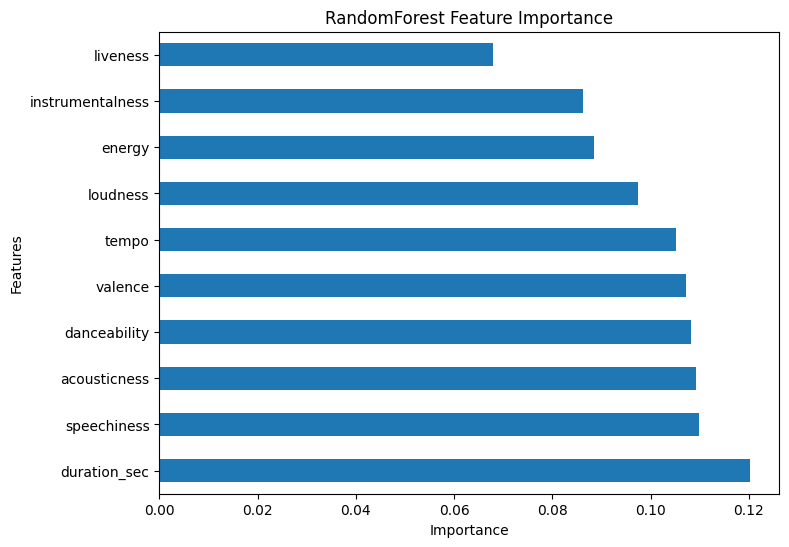

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(rf_model.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nFeature Importance:\n")
print(feat_imp)

plt.figure(figsize=(8,6))
feat_imp.plot(kind="barh")
plt.title("RandomForest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
